# 机器学习作业:线性回归

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [260]:
#用的是吴恩达视频里面的波士顿房价的数据
data = pd.read_csv("./HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,1.00,36.2


In [261]:
# 将前100行作为训练数据
train_datas = data.iloc[:100, :]
train_datas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,1.00,36.2


In [262]:
# 将剩余的所有行作为测试数据
test_datas = data.iloc[100:, :]
test_datas.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
100,0.14866,0.0,8.56,0.0,0.52,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
101,0.11432,0.0,8.56,0.0,0.52,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
102,0.22876,0.0,8.56,0.0,0.52,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
103,0.21161,0.0,8.56,0.0,0.52,6.137,NaN,2.7147,5,384,20.9,394.47,13.44,19.3
104,0.13960,0.0,8.56,0.0,0.52,6.167,90.0,2.4210,5,384,20.9,392.69,12.33,20.1


## 这里将使用LSTAT和MEDV: 自住房屋房价中位数来做单个参数的线性回归

In [263]:
# 将 train_datas 中的 RAD 和 MEDV 列转换为 DataFrame
train_datas_LSTAT = train_datas[['LSTAT']]
train_datas_MEDV = train_datas[['MEDV']]

# 将 test_datas 中的 RAD 和 MEDV 列转换为 DataFrame
test_datas_LSTAT = test_datas[['LSTAT']]
test_datas_MEDV = test_datas[['MEDV']]

In [264]:
train_datas_new = pd.concat([train_datas_LSTAT, train_datas_MEDV], axis=1)
train_datas_new.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,1.00,36.2


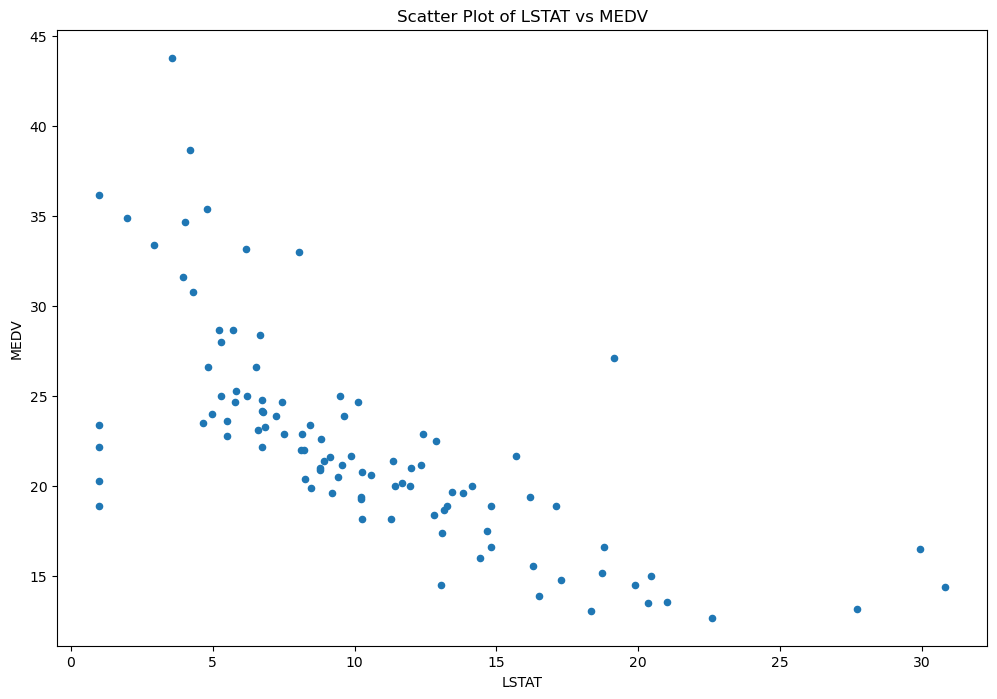

In [265]:
train_datas_new.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(12, 8))
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [266]:
train_datas_LSTAT.insert(0, "Ones", 1)
# 查看修改后的 train_datas_RAD
train_datas_LSTAT.head()

,Ones,LSTAT
0,1,4.98
1,1,9.14
2,1,4.03
3,1,2.94
4,1,1.00


In [267]:
train_datas_MEDV.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [268]:
#把训练数据改为np矩阵，以及初始化theta
train_datas_LSTAT = np.matrix(train_datas_LSTAT.values)
train_datas_MEDV = np.matrix(train_datas_MEDV.values)
theta = np.matrix(np.array([0,0]))
theta,train_datas_LSTAT.shape,train_datas_MEDV.shape

(matrix([[0, 0]]), (100, 2), (100, 1))

# 这里定义计算误差函数
$J(\theta)=Σ_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2$

In [269]:
def computeCost(x, y, theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [270]:
#这个是未进行梯度下降前的J(theta)的值
computeCost(train_datas_LSTAT,train_datas_MEDV,theta)

266.24045

# 批量梯度下降

In [271]:
def gradientDescent(x,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=(x*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,x[:,j])
            temp[0,j] = theta[0,j]-((alpha/len(x))*np.sum(term))
        theta = temp
        cost[i]=computeCost(x,y,theta)
    return theta,cost

In [272]:
#这里进行梯度下降
alpha = 0.01
iters = 1000
g,cost=gradientDescent(train_datas_LSTAT,train_datas_MEDV,theta,alpha,iters)
g

matrix([[27.08533035, -0.51625162]])

# 再次计算误差值

In [273]:
computeCost(train_datas_LSTAT,train_datas_MEDV,g)

9.464416741703227

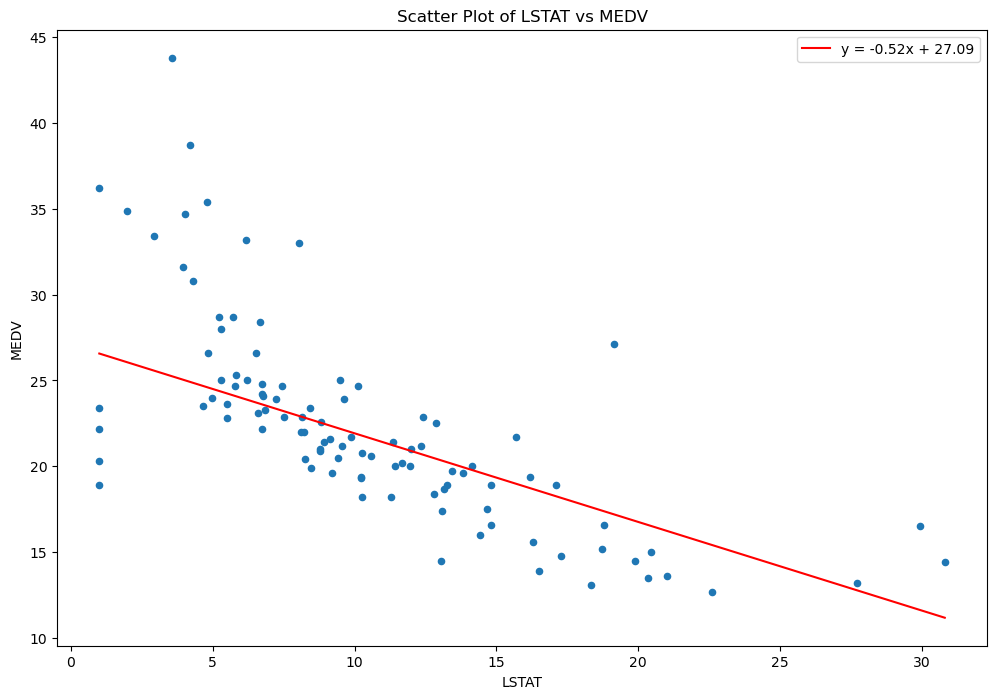

In [274]:
# 绘制散点图
train_datas_new.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(12, 8))
plt.title('Scatter Plot of LSTAT vs MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

# 给定的参数
theta = np.array([[27.08533035, -0.51625162]])
intercept = g[0, 0]  # y轴截距
slope = g[0, 1]      # 斜率

# 生成 x 值
x = np.linspace(train_datas_new['LSTAT'].min(), train_datas_new['LSTAT'].max(), 100)
# 计算对应的 y 值
y = slope * x + intercept

# 绘制直线
plt.plot(x, y, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend()

plt.show()

## 测试数据

In [275]:
test_datas_new = pd.concat([test_datas_LSTAT, test_datas_MEDV], axis=1)
test_datas_new.head()

,LSTAT,MEDV
100,9.42,27.5
101,7.67,26.5
102,10.63,18.6
103,13.44,19.3
104,12.33,20.1


In [276]:
for index, value in enumerate(test_datas_new.iloc[:, 0]):  # 遍历第一列的值
    predicted_value = g[0, 1] * value + g[0, 0] 
    actual_value = test_datas_new.iloc[index, 1] 
    print(f'预测值为: {predicted_value}, 真实值为: {actual_value}')

预测值为: 22.222240093701565, 真实值为: 27.5
预测值为: 23.12568042731505, 真实值为: 26.5
预测值为: 21.59757563446024, 真实值为: 18.6
预测值为: 20.146908584486596, 真实值为: 19.3
预测值为: 20.719947881807144, 真实值为: 20.1
预测值为: 18.582666178287248, 真实值为: 19.5
预测值为: 17.452075132222376, 真实值为: 19.5
预测值为: 19.811345032001586, 真实值为: 20.4
预测值为: 20.750922978959608, 真实值为: 19.8
预测值为: 19.057617667958336, 真实值为: 19.4
预测值为: 20.374059296937986, 真实值为: 21.7
预测值为: 21.840213895487864, 真实值为: 22.8
预测值为: 18.71689159928125, 真实值为: 18.8
预测值为: 18.262590174378474, 真实值为: 18.7
预测值为: 21.690500925917632, 真实值为: 18.5
预测值为: 18.949204827924717, 真实值为: 18.3
预测值为: 26.56907872743044, 真实值为: 21.2
预测值为: 21.767938668798784, 真实值为: 19.2
预测值为: 19.150542959415723, 真实值为: 20.4
预测值为: 20.059145809221285, 真实值为: 19.3
预测值为: 19.666794578623428, 真实值为: 22.0
预测值为: 19.7184197405442, 真实值为: 20.3
预测值为: 17.828938814243998, 真实值为: 20.5
预测值为: 13.967376702570368, 真实值为: 17.3
预测值为: 18.0096268809667, 真实值为: 18.8
预测值为: 19.439643866172037, 真实值为: 21.4
预测值为: 13.012311207036115, 真实值为: 15.7
预测值为: 18.